# Custom objects and their rendering in IPython
### Example of how to use object representations

In [1]:
import rdkit.Chem as Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration

### Lets say you need to create a custom object and you'd like to control the default representation

We'll create an object that can store multiple molecules

In [2]:
class primitiveMolsObject():
    def __init__(self, mols=None):
        self.mols = mols
        self.num = len(mols) # Return number of mols

Get some mols and put them in a list

In [3]:
mol1 = Chem.MolFromSmiles('NC(=O)CS(=O)C(c1ccccc1)c1ccccc1')

In [4]:
mol2 = Chem.MolFromSmiles('CCC(OC(C)=O)C(CC(C)N(C)C)(c1ccccc1)c1ccccc1')

In [5]:
mol3 = Chem.MolFromSmiles(' Cc1ccccc1C(OCCN(C)C)c1ccccc1')

In [6]:
mols = [mol1, mol2, mol3]

Create model instance wih your mols

In [7]:
MyMols = primitiveMolsObject(mols)

In [8]:
MyMols

<__main__.primitiveMolsObject instance at 0x7f6cd9567908>

Default rendering gives very little info about contents

In [9]:
MyMols.mols

In [10]:
MyMols.num

3

### Luckily default representations of objects in ipython can be easily controled with \_repr\_html\_

Lets define the object again, this time with functions that control representation

In [11]:
class primitiveMolsObject2():
    def __init__(self, mols=None):
        self.mols = mols
        self.num = len(mols) # Return number of mols
    
    def _repr_html_(self):
        # Default representation in IPython
        smilesString = ''
        for mol in mols:
            smilesString += Chem.MolToSmiles(mol) + ", " 
        return smilesString #'<img src="data:image/png;base64,%s" alt="Mol"/>' %s

In [12]:
MyMols2 = primitiveMolsObject2(mols)

Much better! We can acually see what hides behind an object

In [13]:
MyMols2

<__main__.primitiveMolsObject2 instance at 0x7f6cd958c050>

#### Or we can add graphic representation

In [14]:
from base64 import b64encode
from StringIO import StringIO

class primitiveMolsObject3():
    def __init__(self, mols=None):
        self.mols = mols
        self.num = len(mols) # Return number of mols
    
    def _repr_html_(self):
        # Default representation in IPython
        sio = StringIO()
        Draw.MolsToGridImage(self.mols).save(sio,format='PNG')
        s = b64encode(sio.getvalue()) # Encode in base64
        return '<img src="data:image/png;base64,%s" alt="Mol"/>' %s

In [15]:
MyOtherMols = primitiveMolsObject3(mols)

Much better! We can acually see what hides behind an object

<__main__.primitiveMolsObject3 instance at 0x7f6cd958cbd8>
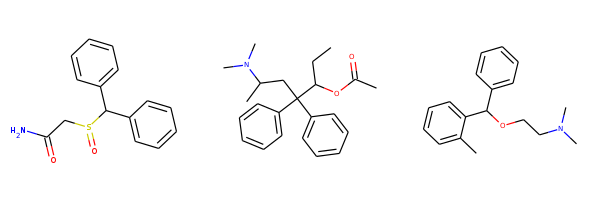

In [16]:
MyOtherMols

Copyright (C) 2014 by Samo Turk, BioMed X GmbH

This work is licensed under the Creative Commons Attribution-ShareAlike 3.0 License. To view a copy of this license, visit http://creativecommons.org/licenses/by-sa/3.0/ or send a letter to Creative Commons, 543 Howard Street, 5th Floor, San Francisco, California, 94105, USA.
